# Task 1 : Prediction using Supervised ML
:- By Shubhendu Mishra

# Simple Linear Regression
This is a Simple linear Regression task as it involves Just One faeture that is number of hours a student studies and using the simple linear regression model. 

# Step-1 
Importing of Libraries and provided dataset


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Step 2 
Check out whether the Feature provided is normalized or not. Here We have used distribution plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


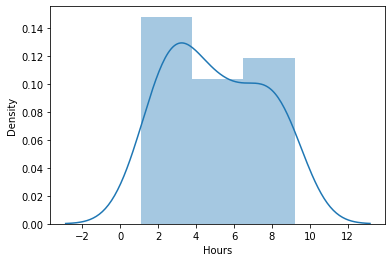

In [39]:
sns.distplot(data['Hours'])

In [40]:
data['Hours'].mean()

5.012

In [41]:
data['Scores'].mean()

51.48

#Step 3
Separate out the features and the target variables. Here only one feature column is available i.e 'Hours' and the target variable is 'Scores'.

In [42]:
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values
print(x,y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#Step 4
Plotting of features and target variable. The graph Shows that the given problem is linear as we can fit a linear regression 

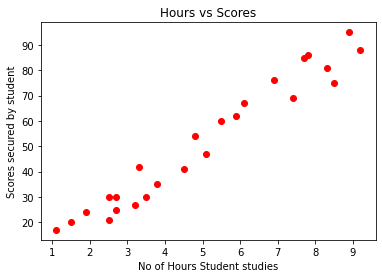

In [43]:
plt.scatter(x,y,color='red')
plt.title('Hours vs Scores')
plt.xlabel('No of Hours Student studies')
plt.ylabel('Scores secured by student')
plt.show()

#Step 5
Splitting of the train and the test data with test size of 20%

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1)

In [50]:
print( x_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [46]:
print(y_train, y_test)

[85 67 69 30 27 30 88 60 35 47 30 21 95 86 76 25 81 41 62 20] [17 42 24 75 54]


#Step 6
Train the Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Step 7
Predict the values using the test data

In [48]:
y_pred = regressor.predict(x_test)
print(y_pred)

[ 9.97026179 32.98470004 18.33914843 87.38246316 48.67636248]


#Testing with own data

In [58]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 95.22829438402952


#Plotting of training set results

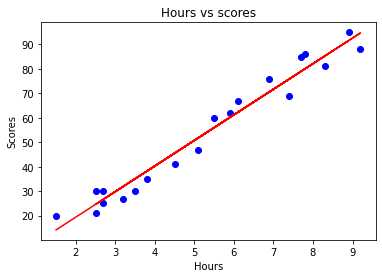

In [63]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.title('Hours vs scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#plotting of the test set results

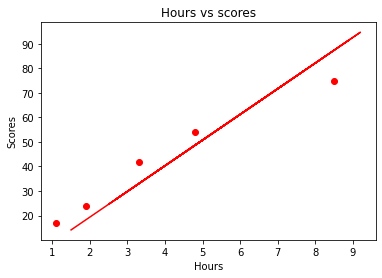

In [62]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.title('Hours vs scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#Plotting of the regession line

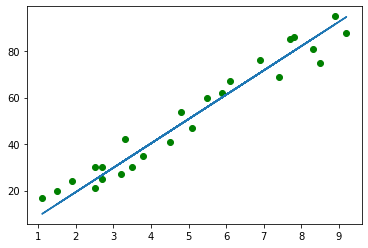

In [61]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y, color='green')
plt.plot(x, line);
plt.show()

# Comparing Actual vs Predicted

In [60]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


#Evaluating the model
The final step is to evaluate the performance of the model. Here we have chosen mean absolute error.

In [59]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 7.882398086270432
